# Notebook demonstrating the use of Timeseriesai for generating predictions
https://github.com/timeseriesAI/timeseriesAI

## The below is done using the tutorial data set (one state, one season) and is a very small dataset so the results are only intended for use on how to use this, not necessarily what the ML capability is

### uses env timeseriesai

In [1]:
%reload_ext autoreload
%autoreload 2
#%matplotlib inline

In [2]:
#from tsai.all import *
#from joblib import Parallel, delayed
from openavalancheproject.tsai_utilities import *
import numpy as np
import pandas as pd

In [3]:
data_root = '/media/scottcha/Data2/OAPMLData/'

ml_path = data_root + '/5.MLData/'
num_features = 771
interpolation = 1
label = 'Day1DangerAboveTreeline'
file_label = 'co_day1above_nooversample_med'
#file_label = 'day1above'
#label = 'Day1DangerAboveTreeline'

In [4]:
#load the full X datafile which has both Train and Test concated
X = np.load(ml_path + '/X_all_' + file_label + '.npy', mmap_mode='r')

In [5]:
X.shape

(12000, 771, 180)

In [6]:
utils = TSAIUtilities(X, label)

In [7]:
X = X[:,:,:]

In [8]:
#read in the corresponding label files and concat them
#can get the right values here based on the contents of hte ml_path directory

num_train_files = 2
file_list = []
for i in range(num_train_files):
    file_list.append(pd.read_parquet(ml_path + '/y_train_batch_' + str(i) + '_' + file_label + '.parquet'))

    
num_test_files = 1
for i in range(num_test_files):
    file_list.append(pd.read_parquet(ml_path + '/y_test_batch_' + str(i) + '_' + file_label + '.parquet'))
    
y_df = pd.concat(file_list).reset_index(drop=True)

In [9]:
y_df['Day1DangerAboveTreeline'].value_counts()

Considerable    3017
Low             3017
Moderate        3016
High            2950
Name: Day1DangerAboveTreeline, dtype: int64

In [10]:
y_df.shape[0]

12000

In [11]:
X = X[:y_df.shape[0], :, :]

In [12]:
X.shape

(12000, 771, 180)

In [13]:
y_df.shape

(12000, 302)

In [14]:
no_dupes = y_df.drop_duplicates()

In [15]:
no_dupes.shape

(12000, 302)

In [16]:
y_df['season'].value_counts()

18-19    2758
17-18    2166
20-21    2000
15-16    1797
16-17    1693
19-20    1586
Name: season, dtype: int64

In [17]:
y_df['parsed_date'].value_counts()

2017-01-10    111
2019-03-07    110
2019-03-13    103
2019-03-09     96
2020-12-29     96
             ... 
2015-11-19      1
2017-01-29      1
2017-02-03      1
2016-11-20      1
2020-12-17      1
Name: parsed_date, Length: 933, dtype: int64

In [18]:
y_df[label].value_counts()

Considerable    3017
Low             3017
Moderate        3016
High            2950
Name: Day1DangerAboveTreeline, dtype: int64

In [19]:
y, cat_dict = utils.get_y_as_cat(y_df)
cat_dict

{0: 'Low', 1: 'Moderate', 2: 'Considerable', 3: 'High'}

In [20]:
feature_names = pd.read_csv(ml_path + '/FeatureLabels_' + file_label + '.csv')
feature_names = feature_names['0'].sort_values().values

In [21]:
feature_names.shape

(771,)

In [22]:
X.shape

(12000, 771, 180)

In [23]:
import xarray as xr

In [24]:
da = xr.DataArray(X, dims=['sample','feature', 'timestep'], coords=[range(0,12000),feature_names,range(0,180)])

In [25]:
feature_names

array(['ABSV_1000mb_avg', 'ABSV_1000mb_max', 'ABSV_1000mb_min',
       'ABSV_100mb_avg', 'ABSV_100mb_max', 'ABSV_100mb_min',
       'ABSV_10mb_avg', 'ABSV_10mb_max', 'ABSV_10mb_min',
       'ABSV_150mb_avg', 'ABSV_150mb_max', 'ABSV_150mb_min',
       'ABSV_200mb_avg', 'ABSV_200mb_max', 'ABSV_200mb_min',
       'ABSV_20mb_avg', 'ABSV_20mb_max', 'ABSV_20mb_min',
       'ABSV_250mb_avg', 'ABSV_250mb_max', 'ABSV_250mb_min',
       'ABSV_300mb_avg', 'ABSV_300mb_max', 'ABSV_300mb_min',
       'ABSV_30mb_avg', 'ABSV_30mb_max', 'ABSV_30mb_min',
       'ABSV_350mb_avg', 'ABSV_350mb_max', 'ABSV_350mb_min',
       'ABSV_400mb_avg', 'ABSV_400mb_max', 'ABSV_400mb_min',
       'ABSV_450mb_avg', 'ABSV_450mb_max', 'ABSV_450mb_min',
       'ABSV_500mb_avg', 'ABSV_500mb_max', 'ABSV_500mb_min',
       'ABSV_50mb_avg', 'ABSV_50mb_max', 'ABSV_50mb_min',
       'ABSV_550mb_avg', 'ABSV_550mb_max', 'ABSV_550mb_min',
       'ABSV_600mb_avg', 'ABSV_600mb_max', 'ABSV_600mb_min',
       'ABSV_650mb_avg', 'ABSV_65

In [ ]:
one_of_each_feature = 

In [57]:
da.sel(feature='SNOD_surface_max')

<xarray.DataArray (sample: 12000, timestep: 180)>
array([[   nan,    nan,    nan, ...,  0.07 ,  0.04 ,  0.02 ],
       [   nan,    nan,    nan, ...,  0.09 ,  0.02 ,  0.11 ],
       [   nan,    nan,    nan, ...,  0.04 ,  0.02 ,  0.11 ],
       ...,
       [ 0.02 ,  0.   ,  0.   , ...,  0.015, -0.004,  0.007],
       [ 0.   ,  0.   ,  0.   , ...,  0.022, -0.008, -0.002],
       [ 0.01 ,  0.01 ,  0.   , ...,  0.   , -0.003,  0.002]],
      dtype=float32)
Coordinates:
  * sample    (sample) int64 0 1 2 3 4 5 ... 11994 11995 11996 11997 11998 11999
    feature   <U16 'SNOD_surface_max'
  * timestep  (timestep) int64 0 1 2 3 4 5 6 7 ... 173 174 175 176 177 178 179

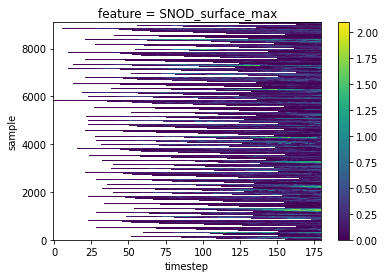

In [27]:
da.sel(feature='SNOD_surface_max', sample=range(0,9100)).plot()

In [28]:
y.shape


(12000,)

In [29]:
#X, y, splits = get_classification_data('ECG200', split_data=False)

In [30]:
X.shape

(12000, 771, 180)

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sktime.classification.compose import ColumnEnsembleClassifier, ComposableTimeSeriesForestClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.classification.kernel_based import ROCKETClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.datatypes._panel._convert import (
    from_2d_array_to_nested,
    from_3d_numpy_to_nested,
    from_nested_to_2d_array,
    is_nested_dataframe,
)
from sktime.utils.slope_and_trend import _slope
from sktime.transformations.panel.summarize import RandomIntervalFeatureExtractor
from sklearn.tree import DecisionTreeClassifier

In [32]:
feature = ['WEASD_surface_max', 'SNOD_surface_max', 'HGT_surface_min', 'VVEL_150mb_avg', 'UGRD_30M0mbaboveground_max', 'VGRD_30M0mbaboveground_max']

In [33]:
da.sel(feature=feature).fillna(0).feature.values

array(['WEASD_surface_max', 'SNOD_surface_max', 'HGT_surface_min',
       'VVEL_150mb_avg', 'UGRD_30M0mbaboveground_max',
       'VGRD_30M0mbaboveground_max'], dtype=object)

In [33]:
sub_da = da.sel(feature=feature).fillna(0)
X_nested = from_3d_numpy_to_nested(sub_da, column_names=sub_da.feature.values)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_nested, y, test_size=2000, shuffle=False)

In [48]:

%%time


#classifier = TimeSeriesForestClassifier(n_jobs=20)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
#accuracy_score(y_test, y_pred)
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=200, n_jobs=20, min_interval=2)),
]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

CPU times: user 2.36 s, sys: 538 ms, total: 2.9 s
Wall time: 51.9 s


0.363

In [66]:
rclf = ROCKETClassifier(n_jobs=20)
rclf.fit(X_train, y_train)

TypeError: No matching definition for argument type(s) array(float32, 3d, C), Tuple(array(float64, 1d, C), array(int32, 1d, C), array(float64, 1d, C), array(int32, 1d, C), array(int32, 1d, C), array(int32, 1d, C), array(int32, 1d, C))

In [46]:
??TimeSeriesForestClassifier

In [60]:
#estimators: 100==.373
#10==.3585
clf = ColumnEnsembleClassifier(
    estimators=[
        ("TSF0", TimeSeriesForestClassifier(n_estimators=200, n_jobs=10), [0]),
        ("TSF1", TimeSeriesForestClassifier(n_estimators=200, n_jobs=10), [1]),
        ("TSF2", TimeSeriesForestClassifier(n_estimators=200, n_jobs=10), [2]),
    ]
)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3755

In [37]:
??MrSEQLClassifier

In [45]:
%%time

clf = MrSEQLClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/home/scottcha/miniconda3/envs/sktime/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


CPU times: user 5h 37min 50s, sys: 14min 24s, total: 5h 52min 14s
Wall time: 1h 38min 18s


0.3205

In [164]:
import matplotlib.pyplot as plt

<AxesSubplot:>

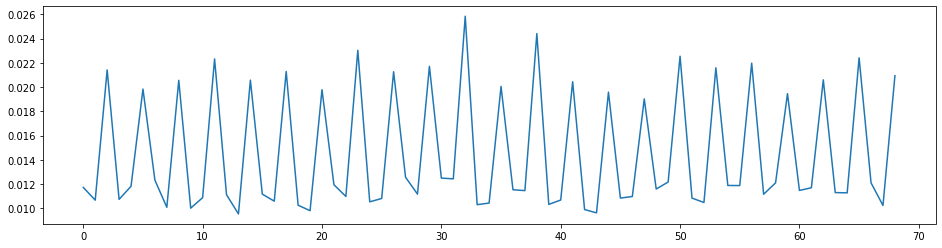

In [171]:
fix, ax = plt.subplots(1,figsize=plt.figaspect(0.25))
fi.plot(ax=ax)

In [161]:
ColumnConcatenator().fit(X_test).transform(X_test)[0][0]

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
          ...     
535    2822.139893
536    2822.139893
537    2822.139893
538    2822.139893
539    2822.139893
Length: 540, dtype: float32

In [65]:
y_test_pred = clf.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred, normalize='true')

array([[0.54932302, 0.33462282, 0.08897485, 0.0270793 ],
       [0.41860465, 0.30620155, 0.21317829, 0.0620155 ],
       [0.17021277, 0.25725338, 0.49323017, 0.07930368],
       [0.08444444, 0.45333333, 0.35333333, 0.10888889]])

In [246]:
from captum.attr import IntegratedGradients
from captum.attr import LayerConductance
from captum.attr import NeuronConductance

/home/scottcha/miniconda3/envs/tsai2.22/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/__init__.py:2: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes_divider import Divider, SubplotDivider, LocatableAxes, \


In [331]:
net = learn.model.cpu()

In [332]:
b = dls.one_batch()

In [333]:
test_input_tensor = b[0].type(torch.FloatTensor)

In [334]:
test_labels = b[1].cpu().data.numpy()

In [335]:
out_probs = net(test_input_tensor).detach().cpu().numpy()
out_classes = np.argmax(out_probs, axis=1)
train_accuracy = sum(out_classes == test_labels) / len(test_labels)
print("Accuracy:", train_accuracy )

Accuracy: 0.734375


In [43]:
mlflow.log_metric('Train Accuracy', train_accuracy)

NameError: name 'mlflow' is not defined

In [336]:
ig = IntegratedGradients(net)

In [337]:
#test_input_tensor.requires_grad_()
attr, delta = ig.attribute(test_input_tensor,target=1, return_convergence_delta=True)
attr = attr.detach().numpy()

In [288]:
feature_names = feature_names[feature_filter]

NameError: name 'feature_filter' is not defined

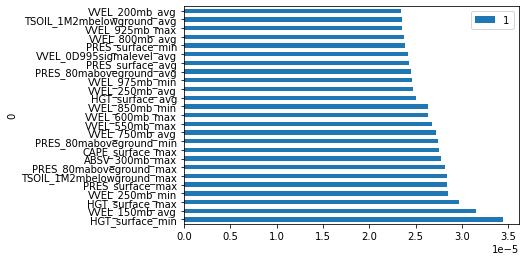

In [339]:
# Helper method to print importances and visualize distribution
def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    pd.DataFrame(zip(feature_names, np.mean(importances, axis=(0,2)))).sort_values(1, ascending=False)[:25].plot.barh(x=0, y=1)

visualize_importances(feature_names, attr)

In [50]:
top_features =  pd.DataFrame(zip(feature_names, np.mean(attr, axis=(0,2))), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)

In [51]:
top_features.to_csv('../Scratch/Notebooks/' + '/FeatureImportances.csv')

In [29]:
top_features = pd.read_csv('../Scratch/Notebooks/' + '/FeatureImportances.csv')

In [85]:
orig_X = X

In [86]:
orig_feature_means = feature_means

In [87]:
orig_feature_std = feature_std

In [134]:
mlflow.end_run()

In [88]:
feature_filter = top_features[:100].index

In [89]:
X = orig_X[:, feature_filter, :]
feature_means = orig_feature_means[feature_filter]
feature_std = orig_feature_std[feature_filter]

In [35]:
fill_values = torch.zeros_like(TSTensor(X))
for i in range(0,X.shape[1]):
    fill_values[:,i,:] = torch.full_like(TSTensor(X[:,i,:]), feature_means[i])
        
X_noNan = torch.where(torch.isnan(TSTensor(X)), fill_values, TSTensor(X))

In [40]:
X_noNan[:,:,-30:].shape

torch.Size([6000, 100, 30])